In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('/Volumes/Lees_Extend/data/ea_data/OUT.nc')
ds

<xarray.Dataset>
Dimensions:                 (lat: 404, lon: 316, time: 85)
Coordinates:
  * time                    (time) datetime64[ns] 2010-01-01 ... 2017-01-01
  * lon                     (lon) float32 32.524994 32.574997 ... 48.274994
  * lat                     (lat) float32 -4.9750023 -4.925003 ... 15.174995
    month                   (time) int64 ...
Data variables:
    lst_day                 (time, lat, lon) float64 ...
    lst_night               (time, lat, lon) float64 ...
    lst_mean                (time, lat, lon) float64 ...
    evaporation             (time, lat, lon) float64 ...
    baresoil_evaporation    (time, lat, lon) float64 ...
    potential_evaporation   (time, lat, lon) float64 ...
    transpiration           (time, lat, lon) float64 ...
    surface_soil_moisture   (time, lat, lon) float64 ...
    rootzone_soil_moisture  (time, lat, lon) float64 ...
    sm                      (time, lat, lon) float64 ...
    precip                  (time, lat, lon) float6

Done for Varible ndvi
Done for Varible spi
Done for Varible precip
Done for Varible sm
Done for Varible lst_day
Done for Varible lst_night
Done for Varible lst_mean


AttributeError: 'Figure' object has no attribute 'title'

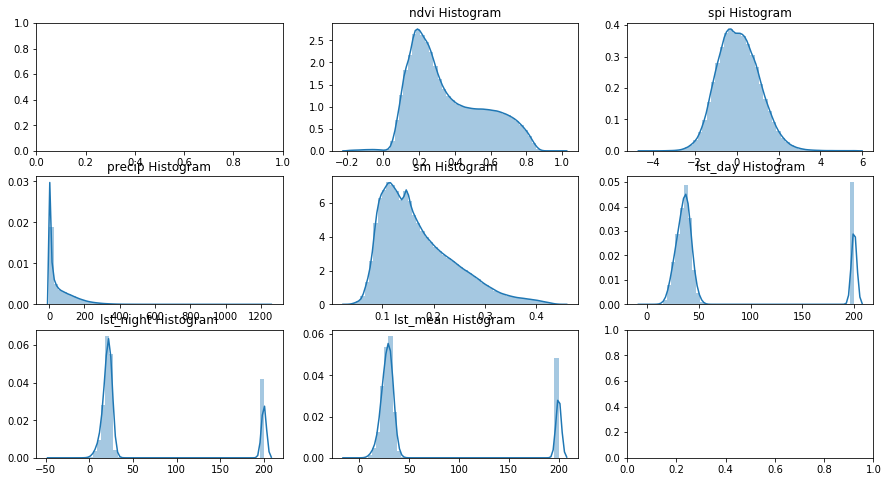

In [61]:
def drop_nans_and_flatten(dataArray):
    """flatten the array and drop nans from that array. Useful for plotting histograms.
    
    Arguments:
    ---------
    : dataArray (xr.DataArray)
        the DataArray of your value you want to flatten
    """
    # drop NaNs and flatten
    return dataArray.values[~np.isnan(dataArray.values)]


def set_no_axs_rows(variables):
    """Dynamically set the number of axes rows
    
    Arguments:
    ---------
    : variables (list)
        the variables that we want to plot distributions of
    """
    # Dynamically set the number of ROWS in the subplots
    if len(variables) % 3 > 0:
        n_axs = (len(variables) // 3) + 1
    else:
        n_axs = len(variables) // 3
    
    return n_axs

def plot_variables(Dataset, variables):
    """ plot histograms of 
    
    Arguments:
    ---------
    : Dataset (xr.Dataset)
        the dataset holding the variables of interest
    : variables (list)
        list of str for the labels of the values that you want to plot
    """
    assert all([var_ in [var for var in ds.variables.keys()] for var_ in variables]), f"The variables supplied must be in the xr.Dataset variables. Currently looking for {variables} in dataset variables: {[var for var in ds.variables.keys()]}\n The variable missing is: {[var_ in [var for var in ds.variables.keys()] for var_ in variables]}"
    
    n_axs = set_no_axs_rows(variables)
    fig, axs = plt.subplots(n_axs, 3, figsize=(15,8))
    
    # plot each of the variables 
    for ix, var in enumerate(variables):
        # get the axes we are plotting on
        ax_ix = np.unravel_index(ix+1,(n_axs,3))
        ax = axs[ax_ix]
        
        # flatten array and drop nans from the variable
        flat_array = drop_nans_and_flatten(ds[var])
        
        # plot the histogram for that variable
        sns.distplot(flat_array, ax=ax)
        ax.set_title(f'{var} Histogram')
        print(f'Done for Varible {var}')
        
    fig.suptitle('Distribution of variable values')
    plt.tight_layout()
    
    return fig
    
variables = ["ndvi","spi","precip","sm","lst_day","lst_night","lst_mean"]
# variables = ["ndvi","spi"]
# TODO: why doesn't it work with 2 values?
fig = plot_variables(ds, variables)
fig.savefig('../figs/variable_distribution.png')

In [49]:
assert False, "The following does not work because the unravel index doesn't work for "

variables = ["ndvi","spi"]
plot_variables(ds, variables)

(0, 1)